In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Import Dataset**

In [244]:
df = pd.read_csv('data/sales.csv')
df.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


## Explatory Data Analysis

In [245]:
df.shape

(2000, 11)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


## Types of variables  

In this section, I separate the dataset into categorical and numerical variables.

In [247]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['sale_date', 'sale_time', 'gender', 'category']


In [248]:
df_categorical = df[categorical].copy()
df_categorical.head()

,sale_date,sale_time,gender,category
0,2022-11-05,10:47:00,Male,Clothing
1,2022-07-09,11:00:00,Male,Beauty
2,2022-12-12,10:48:00,Female,Clothing
3,2022-01-06,08:53:00,Male,Clothing
4,2022-11-14,08:35:00,Male,Beauty


In [249]:
df_categorical.isnull().sum()

sale_date    0
sale_time    0
gender       0
category     0
dtype: int64

In [250]:
# Convert 'sale_date' to datetime format
df_categorical['sale_date'] = pd.to_datetime(df_categorical['sale_date'], format='%Y-%m-%d')

# Convert 'sale_time' to time format
df_categorical['sale_time'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.time

# Check if the conversions were successful
print(df_categorical[['sale_date', 'sale_time']].head())


   sale_date sale_time
0 2022-11-05  10:47:00
1 2022-07-09  11:00:00
2 2022-12-12  10:48:00
3 2022-01-06  08:53:00
4 2022-11-14  08:35:00


Earliest sale date: 2022-01-01 00:00:00
Latest sale date: 2023-12-31 00:00:00


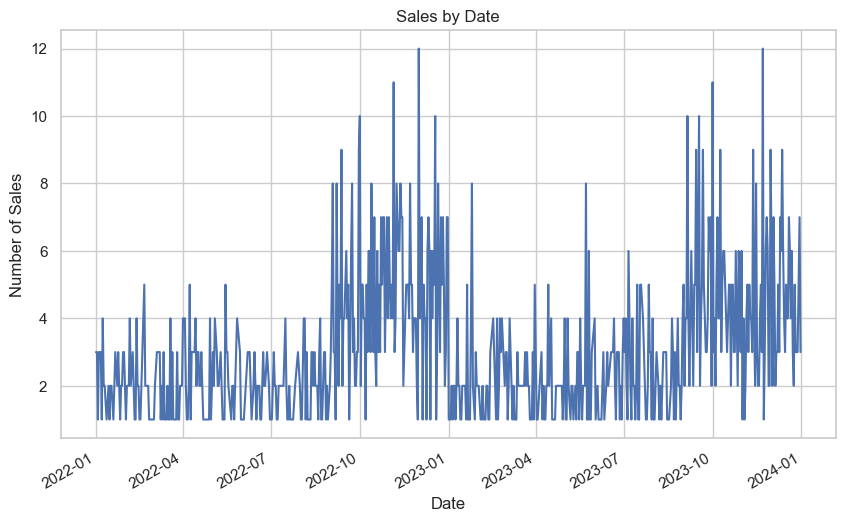

In [251]:
# Check for the range of dates
print(f"Earliest sale date: {df_categorical['sale_date'].min()}")
print(f"Latest sale date: {df_categorical['sale_date'].max()}")

# Optional: Plot sales over time to visually inspect outliers
import matplotlib.pyplot as plt

df_categorical['sale_date'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title('Sales by Date')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.show()


**Seasonal or Periodic Trends:**  

    There is a noticeable increase in the number of sales between September 2022 and February 2023, peaking around the end of 2022 and early 2023. This could indicate seasonal demand or holiday-related shopping trends, such as Black Friday, Christmas, and New Year sales.  

    After February 2023, the sales drop significantly before slowly picking up again towards October 2023, which may indicate a cyclical or seasonal pattern, perhaps due to promotions or events in certain months.   

**Periods of Low Sales:**

    There are distinct periods where sales activity is very low, particularly between April 2023 and July 2023. This could be due to off-peak seasons, economic factors, or lack of promotions during this time.   

**Sales Spikes:**   

    The sharp spikes, especially in January 2023 and October 2023, suggest brief periods of higher-than-normal activity. These spikes could be caused by flash sales, limited-time offers, or specific events like holidays or back-to-school periods.   

**Recent Activity:**  

    Sales seem to pick up again in October 2023 and continue with some volatility towards the end of the year. It indicates that sales in this period might be rising again as businesses prepare for the holiday season.


**Potential Actions Based on the Visualization:**  

**1. Plan Promotions Around Peak Periods:**  

    If certain months like December/January or October/November consistently show higher sales, you can focus marketing campaigns and promotions around these times to maximize profit.  

**2. Investigate Low-Activity Months:**  

    The period from April to July 2023 shows reduced sales. It may be worth investigating why this is happening. Are there fewer promotions? Is this an off-season for certain products?  

**3. Leverage Holiday Season:**  

    The sales surge around the holiday period (late 2022, early 2023) indicates that customers may respond positively to promotions during this time. Adjust pricing, stock, and marketing to capitalize on holiday shopping trends.  

### Group the Sales by months

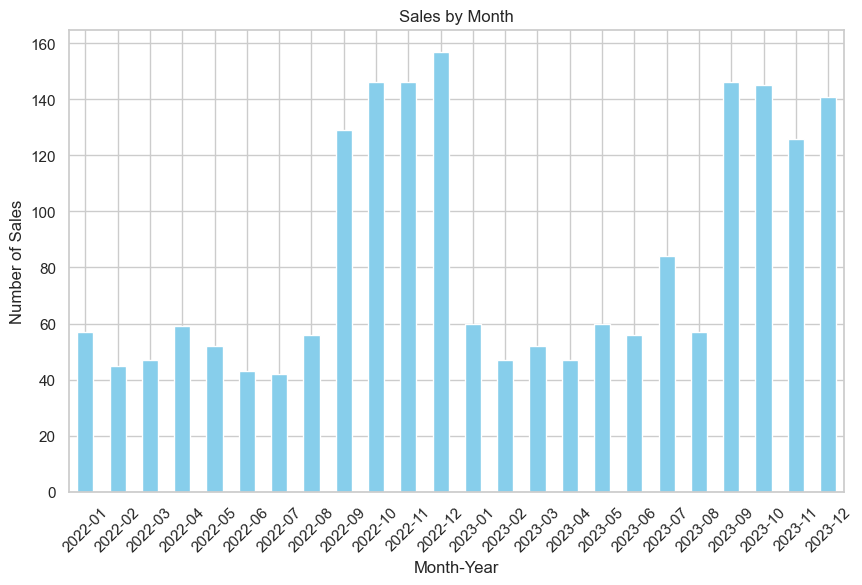

In [252]:
# Convert 'sale_date' to datetime if not already done
df_categorical['sale_date'] = pd.to_datetime(df_categorical['sale_date'])

# Extract the month and year for easier grouping
df_categorical['month_year'] = df_categorical['sale_date'].dt.to_period('M')

# Group by month and count the number of sales per month
monthly_sales = df.groupby(df_categorical['month_year'])['transactions_id'].count()

# Plotting monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


**Peak Sales Periods:**  

    1. August 2022 to January 2023: This period shows a notable rise in sales, with October and December 2022 having the highest sales volumes. This could be due to:  

    * Holiday seasons (like Christmas in December).  
    * Seasonal promotions or events.*  

    2. August to November 2023: Another noticeable peak in sales occurs in these months, which may follow a similar trend as the previous year (perhaps annual promotions or a recurring shopping event).  

**Low Sales Periods:**  

    The lowest sales volumes occur between February 2023 and May 2023. This might indicate an off-peak season where fewer promotions or events take place. Further analysis of external factors, like economic conditions or seasonal trends, could provide more insights.
**Observations:**  

    Recurring Peaks: August to December seems to consistently have high sales, suggesting these months are crucial for business.
    Off-Peak Months: Between February and May, the business appears to slow down, perhaps requiring targeted promotions or campaigns to improve sales during these months.
**Further Analysis:**

    We could analyze specific product categories and customer segments during these high and low periods to see what drives the peaks and dips.
    It would also be useful to look at the average transaction value to see if these high-sales months also correspond to higher revenue per sale.

In [253]:
df_categorical.head()

,sale_date,sale_time,gender,category,month_year
0,2022-11-05,10:47:00,Male,Clothing,2022-11
1,2022-07-09,11:00:00,Male,Beauty,2022-07
2,2022-12-12,10:48:00,Female,Clothing,2022-12
3,2022-01-06,08:53:00,Male,Clothing,2022-01
4,2022-11-14,08:35:00,Male,Beauty,2022-11


In [254]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sale_date   2000 non-null   datetime64[ns]
 1   sale_time   2000 non-null   object        
 2   gender      2000 non-null   object        
 3   category    2000 non-null   object        
 4   month_year  2000 non-null   period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 78.3+ KB


In [255]:
df_categorical['sale_time'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.time

In [256]:
# Display the first few rows to verify
print(df_categorical[['sale_time']].head())

  sale_time
0  10:47:00
1  11:00:00
2  10:48:00
3  08:53:00
4  08:35:00


In [257]:
# Extract the hour and create a new 'hour' column
df_categorical['hour'] = pd.to_datetime(df_categorical['sale_time'], format='%H:%M:%S').dt.hour

# Display the first few rows to verify the new 'hour' column
print(df_categorical[['sale_time', 'hour']].head())


  sale_time  hour
0  10:47:00    10
1  11:00:00    11
2  10:48:00    10
3  08:53:00     8
4  08:35:00     8


In [258]:
df_categorical.drop('sale_time',axis=1, inplace=True)

In [259]:
df_categorical['gender'].value_counts()

gender
Female    1020
Male       980
Name: count, dtype: int64

In [260]:
df_categorical['category'].value_counts()

category
Clothing       702
Electronics    684
Beauty         614
Name: count, dtype: int64

### One-Hot-Encoding

In [261]:
pd.get_dummies(df_categorical['category'], drop_first=False, dtype='int')



,Beauty,Clothing,Electronics
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
1995,0,0,1
1996,1,0,0
1997,0,0,1
1998,1,0,0


In [262]:
df_categorical.head()

,sale_date,gender,category,month_year,hour
0,2022-11-05,Male,Clothing,2022-11,10
1,2022-07-09,Male,Beauty,2022-07,11
2,2022-12-12,Female,Clothing,2022-12,10
3,2022-01-06,Male,Clothing,2022-01,8
4,2022-11-14,Male,Beauty,2022-11,8


In [263]:
pd.get_dummies(df_categorical['gender'], drop_first=False, dtype='int')



,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
1995,0,1
1996,0,1
1997,0,1
1998,0,1


In [264]:
df_categorical.head()

,sale_date,gender,category,month_year,hour
0,2022-11-05,Male,Clothing,2022-11,10
1,2022-07-09,Male,Beauty,2022-07,11
2,2022-12-12,Female,Clothing,2022-12,10
3,2022-01-06,Male,Clothing,2022-01,8
4,2022-11-14,Male,Beauty,2022-11,8


In [265]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sale_date   2000 non-null   datetime64[ns]
 1   gender      2000 non-null   object        
 2   category    2000 non-null   object        
 3   month_year  2000 non-null   period[M]     
 4   hour        2000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(2), period[M](1)
memory usage: 70.4+ KB


In [266]:
df_categorical

,sale_date,gender,category,month_year,hour
0,2022-11-05,Male,Clothing,2022-11,10
1,2022-07-09,Male,Beauty,2022-07,11
2,2022-12-12,Female,Clothing,2022-12,10
3,2022-01-06,Male,Clothing,2022-01,8
4,2022-11-14,Male,Beauty,2022-11,8
...,...,...,...,...,...
1995,2022-11-09,Male,Electronics,2022-11,12
1996,2022-09-12,Male,Beauty,2022-09,14
1997,2023-10-08,Male,Electronics,2023-10,12
1998,2023-11-22,Male,Beauty,2023-11,14


In [267]:
# find categorical variables

categorical = [var for var in df_categorical.columns if df_categorical[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['gender', 'category']


In [268]:
df_encoded= pd.get_dummies(df_categorical[categorical], drop_first=False, dtype='int')



In [269]:
df_categorical.head()

,sale_date,gender,category,month_year,hour
0,2022-11-05,Male,Clothing,2022-11,10
1,2022-07-09,Male,Beauty,2022-07,11
2,2022-12-12,Female,Clothing,2022-12,10
3,2022-01-06,Male,Clothing,2022-01,8
4,2022-11-14,Male,Beauty,2022-11,8


In [270]:
df_encoded.head()

,gender_Female,gender_Male,category_Beauty,category_Clothing,category_Electronics
0,0,1,0,1,0
1,0,1,1,0,0
2,1,0,0,1,0
3,0,1,0,1,0
4,0,1,1,0,0


In [271]:
df_categorical.drop('category', axis=1, inplace=True)
df_categorical.drop('gender', axis=1, inplace=True)

In [272]:
# Concatenating along the columns (axis=1)
merged_df = pd.concat([df_categorical, df_encoded], axis=1)


In [273]:
merged_df.head()

,sale_date,month_year,hour,gender_Female,gender_Male,category_Beauty,category_Clothing,category_Electronics
0,2022-11-05,2022-11,10,0,1,0,1,0
1,2022-07-09,2022-07,11,0,1,1,0,0
2,2022-12-12,2022-12,10,1,0,0,1,0
3,2022-01-06,2022-01,8,0,1,0,1,0
4,2022-11-14,2022-11,8,0,1,1,0,0


### Exploring Numerical Variables

In [274]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 7 numerical variables

The numerical variables are : ['transactions_id', 'customer_id', 'age', 'quantiy', 'price_per_unit', 'cogs', 'total_sale']


In [275]:
df_numerical= df[numerical].copy()

In [276]:
df_numerical.head()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
0,180,117,41.0,3.0,300.0,129.0,900.0
1,522,52,46.0,3.0,500.0,145.0,1500.0
2,559,5,40.0,4.0,300.0,84.0,1200.0
3,1180,85,41.0,3.0,300.0,129.0,900.0
4,1522,48,46.0,3.0,500.0,235.0,1500.0


In [277]:


# check missing values in numerical variables

df_numerical.isnull().sum()

transactions_id     0
customer_id         0
age                10
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

In [278]:
df_numerical.describe()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,2000.000000,2000.000000,1990.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1000.500000,66.341500,41.343216,2.512769,180.117677,95.023886,456.544817
std,577.494589,44.937185,13.668167,1.132708,189.685225,121.898695,560.101381
min,1.000000,1.000000,18.000000,1.000000,25.000000,6.250000,25.000000
25%,500.750000,24.000000,29.000000,1.000000,30.000000,13.000000,60.000000
50%,1000.500000,69.000000,42.000000,3.000000,50.000000,27.500000,150.000000
75%,1500.250000,102.000000,53.000000,4.000000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.000000,500.000000,620.000000,2000.000000


In [279]:
# Example of how to fill null values for each column
df_numerical['age'].fillna(df_numerical['age'].mean(), inplace=True)  # Filling 'age' with mean
df_numerical['quantiy'].fillna(df_numerical['quantiy'].median(), inplace=True)  # Filling 'quantity' with median
df_numerical['price_per_unit'].fillna(df_numerical['price_per_unit'].mean(), inplace=True)  # Filling 'price_per_unit' with mean
df_numerical['cogs'].fillna(df_numerical['cogs'].mean(), inplace=True)  # Filling 'cogs' with mean
df_numerical['total_sale'].fillna(df_numerical['total_sale'].mean(), inplace=True)  # Filling 'total_sale' with mean


In [280]:
df_numerical.isnull().sum()

transactions_id    0
customer_id        0
age                0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64

In [281]:
class BoxplotVisualizer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def draw_boxplots(self):
        # Set the style of seaborn for better aesthetics
        sns.set(style="whitegrid")
        
        # Iterate through each numerical column in the dataframe
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10, 5))  # Set the size of the figure
            sns.boxplot(x=self.dataframe[column])
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()

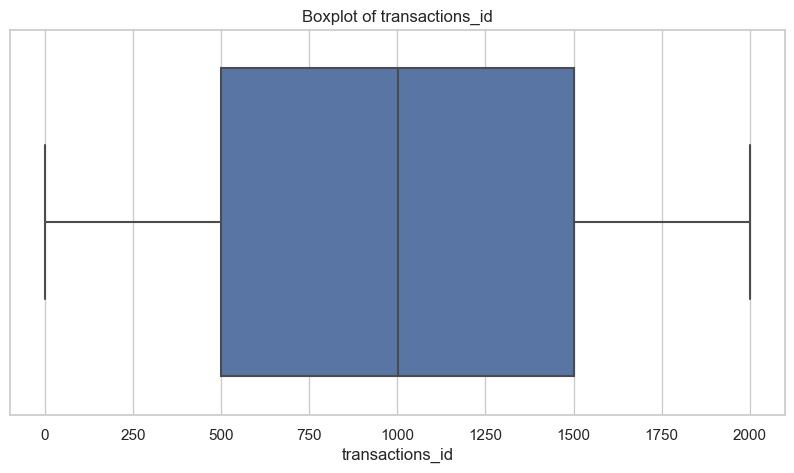

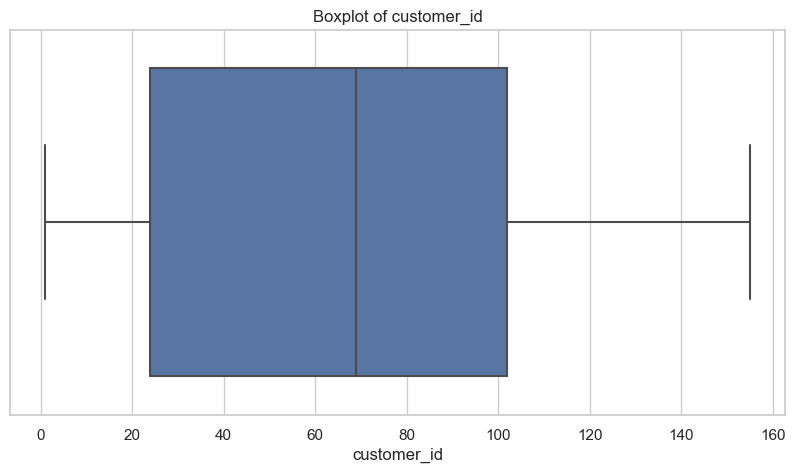

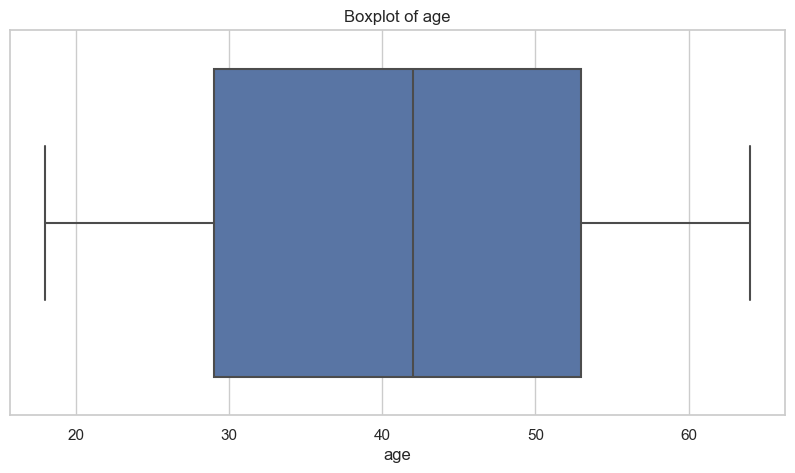

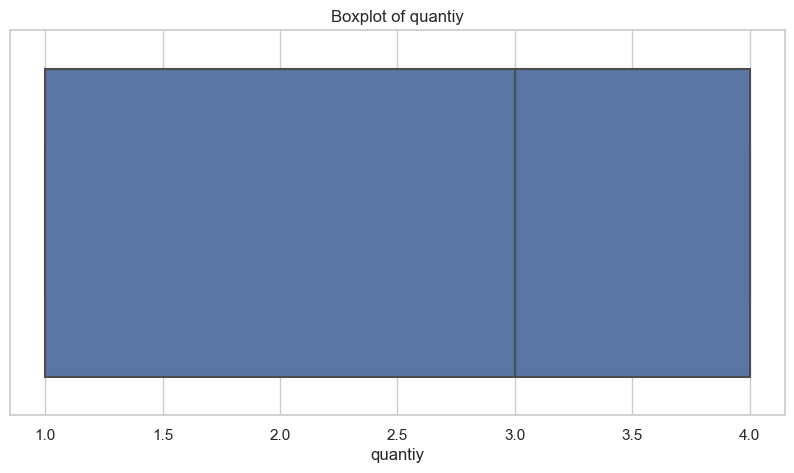

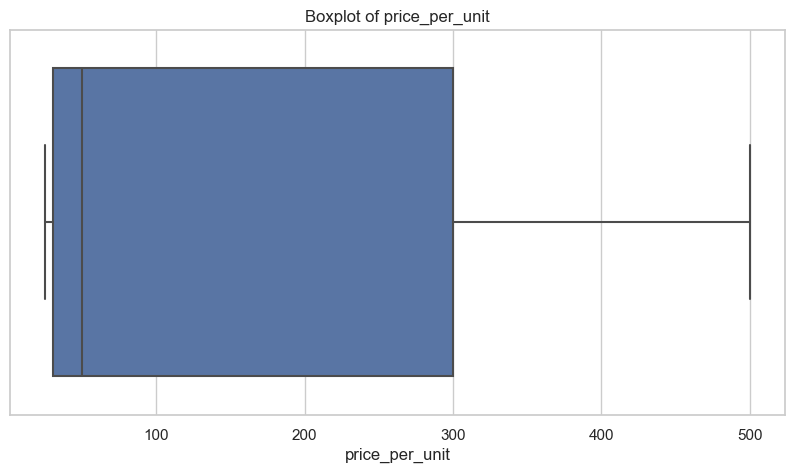

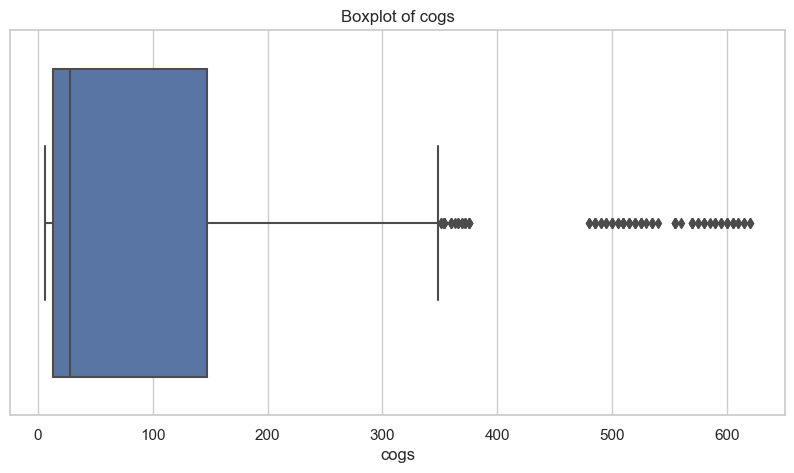

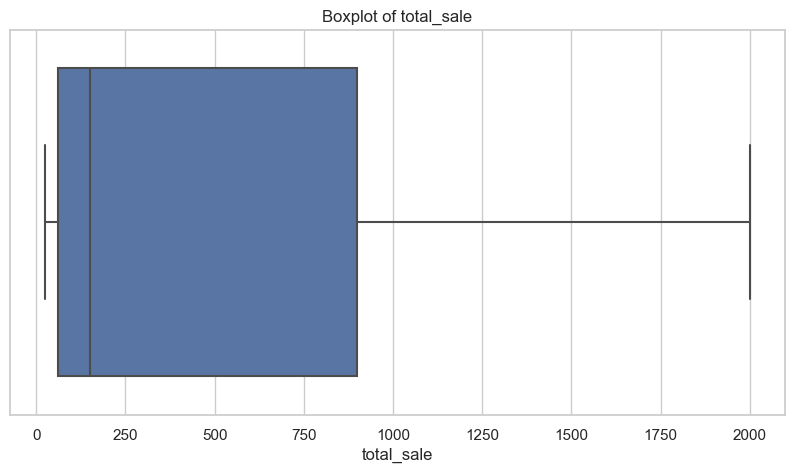

In [282]:
import seaborn as sns
visualizer = BoxplotVisualizer(df_numerical)
visualizer.draw_boxplots()


In [283]:
from scipy.stats import norm, skew

class DistributionAnalyzer:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def check_distributions(self):
        sns.set(style="whitegrid")
        
        for column in self.dataframe.select_dtypes(include='number').columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(self.dataframe[column], kde=True)
            
            # Checking skewness
            skewness = self.dataframe[column].skew()
            
            plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
            
            # Analyze distribution
            if abs(skewness) < 0.5:
                print(f'{column} is approximately normally distributed. Consider extreme value analysis.')
            else:
                print(f'{column} is skewed. Consider using IQR for outlier detection.')
    
    def find_IQR(self, column):
        Q1 = self.dataframe[column].quantile(0.25)
        Q3 = self.dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        print(f'IQR for {column}: {IQR}')
        return IQR


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


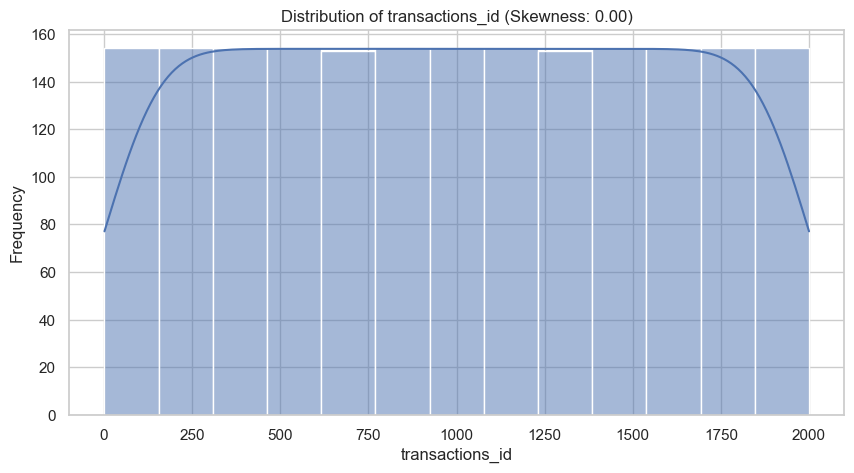

transactions_id is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


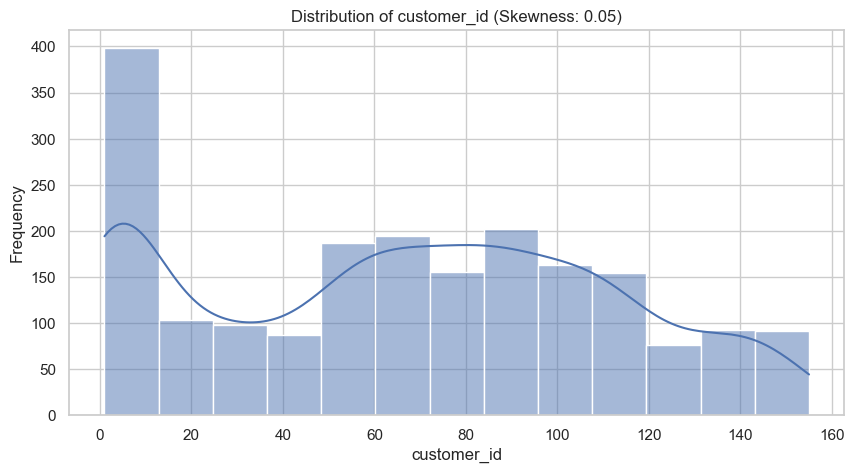

customer_id is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


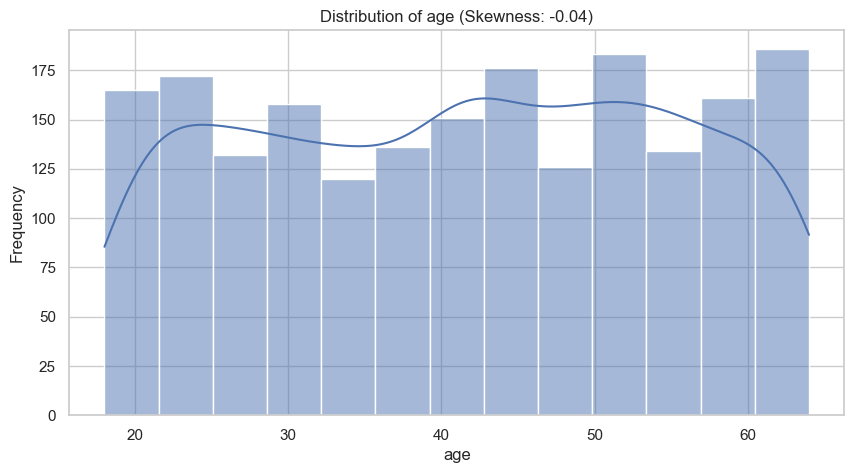

age is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


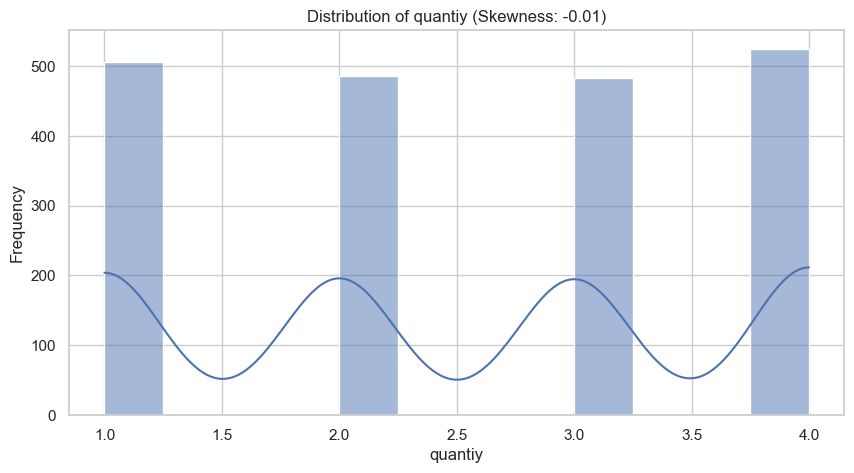

quantiy is approximately normally distributed. Consider extreme value analysis.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


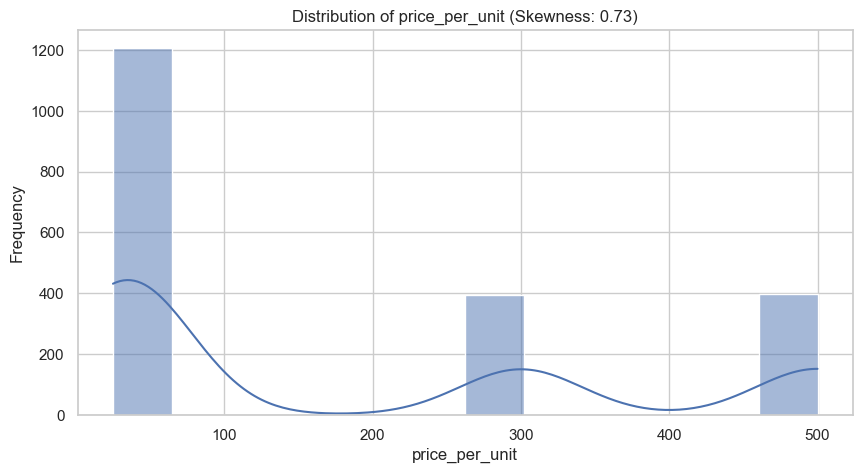

price_per_unit is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


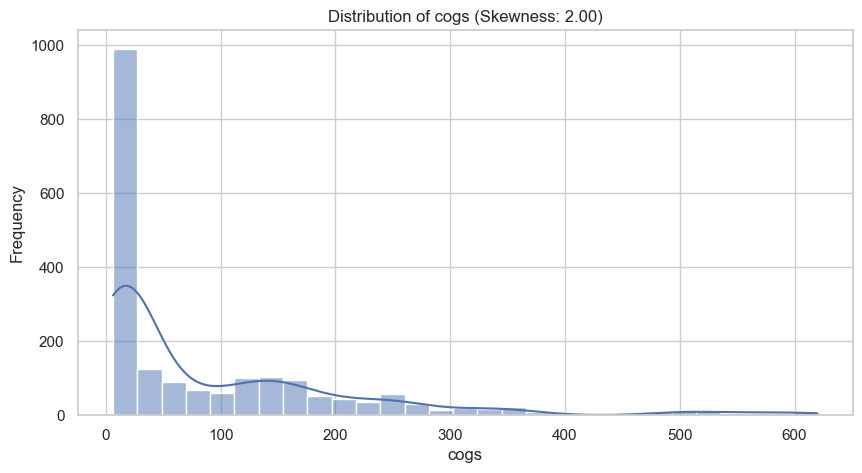

cogs is skewed. Consider using IQR for outlier detection.


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


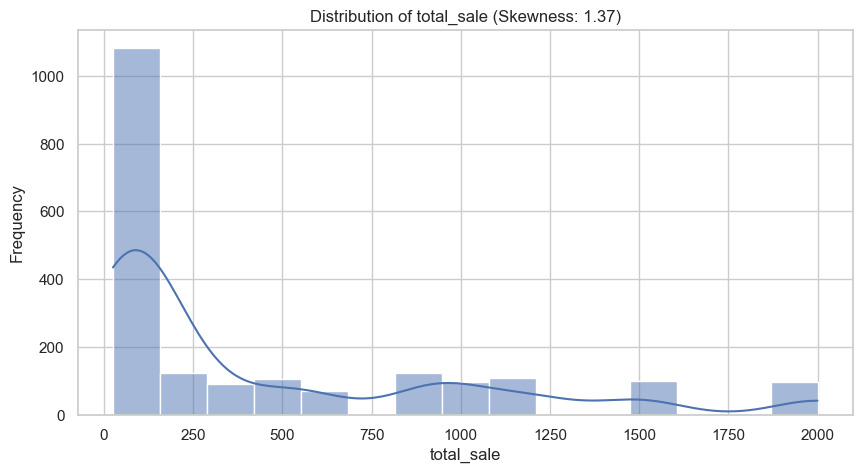

total_sale is skewed. Consider using IQR for outlier detection.


In [284]:
analyzer = DistributionAnalyzer(df_numerical)
analyzer.check_distributions()

### Handling Normal outliers

In [285]:
from scipy.stats import zscore

def handle_normal_outliers(df, columns):
    for column in columns:
        df[f'{column}_zscore'] = zscore(df[column])
        outliers = df[(df[f'{column}_zscore'] > 3) | (df[f'{column}_zscore'] < -3)]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[(df[f'{column}_zscore'] <= 3) & (df[f'{column}_zscore'] >= -3)]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=df[column].quantile(0.01), upper=df[column].quantile(0.99))

    return df.drop([f'{column}_zscore' for column in columns], axis=1)

normal_columns = [
    'quantiy', 'age', 'customer_id', 'transactions_id']

df_numerical = handle_normal_outliers(df_numerical, normal_columns)


quantiy has 0 outliers.
age has 0 outliers.
customer_id has 0 outliers.
transactions_id has 0 outliers.


### Handling Skewed Outliers

In [286]:
def handle_skewed_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        print(f'{column} has {len(outliers)} outliers.')

        # Optionally remove or cap outliers
        # df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
        # Alternatively, cap outliers:
        # df[column] = df[column].clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR))

    return df

skewed_columns = ['total_sale', 'cogs', 'price_per_unit']

df_numerical = handle_skewed_outliers(df_numerical, skewed_columns)


total_sale has 0 outliers.
cogs has 87 outliers.
price_per_unit has 0 outliers.


In [287]:
class OutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def find_outliers_iqr(self, column):
        IQR = self.dataframe[column].quantile(0.75) - self.dataframe[column].quantile(0.25)
        lower_fence = self.dataframe[column].quantile(0.25) - (IQR * 3)
        upper_fence = self.dataframe[column].quantile(0.75) + (IQR * 3)
        print(f'{column} outliers are values < {lower_fence} or > {upper_fence}')
        return lower_fence, upper_fence

# Example Usage
outlier_detector = OutlierDetector(df_numerical)

# Replace 'column_name' with your actual column name
for column in skewed_columns:
    outlier_detector.find_outliers_iqr(column)


total_sale outliers are values < -2460.0 or > 3420.0
cogs outliers are values < -389.0 or > 549.0
price_per_unit outliers are values < -780.0 or > 1110.0


In [288]:
# Concatenating along the columns (axis=1)
merged_df = pd.concat([df_numerical, merged_df], axis=1)


In [289]:
merged_df.head()

,transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale,sale_date,month_year,hour,gender_Female,gender_Male,category_Beauty,category_Clothing,category_Electronics
0,180,117,41.0,3.0,300.0,129.0,900.0,2022-11-05,2022-11,10,0,1,0,1,0
1,522,52,46.0,3.0,500.0,145.0,1500.0,2022-07-09,2022-07,11,0,1,1,0,0
2,559,5,40.0,4.0,300.0,84.0,1200.0,2022-12-12,2022-12,10,1,0,0,1,0
3,1180,85,41.0,3.0,300.0,129.0,900.0,2022-01-06,2022-01,8,0,1,0,1,0
4,1522,48,46.0,3.0,500.0,235.0,1500.0,2022-11-14,2022-11,8,0,1,1,0,0


In [290]:
merged_df['transactions_id'].value_counts()

transactions_id
180     1
751     1
1637    1
1594    1
1200    1
       ..
1974    1
1749    1
1646    1
1357    1
1650    1
Name: count, Length: 2000, dtype: int64

In [291]:
merged_df['customer_id'].value_counts()

customer_id
3      76
1      76
4      73
2      69
5      63
       ..
36      3
34      3
45      3
128     2
123     2
Name: count, Length: 155, dtype: int64

In [292]:
merged_df.drop('month_year', axis=1, inplace=True)

In [293]:
merged_df.drop('transactions_id', axis=1, inplace=True)

In [294]:
merged_df.drop('sale_date', axis=1, inplace=True)

### Declare Feature Vector and target Variable

In [295]:
X = merged_df.drop('total_sale', axis=1)
y = merged_df['total_sale']


In [296]:
merged_df['total_sale'].value_counts()

total_sale
50.000000      230
100.000000     215
900.000000     124
200.000000     124
1200.000000    108
25.000000      102
30.000000      102
500.000000     102
1500.000000    100
2000.000000     98
1000.000000     98
300.000000      92
60.000000       90
75.000000       86
90.000000       86
120.000000      86
150.000000      84
600.000000      70
456.544817       3
Name: count, dtype: int64

### Split data into separate training and test set

In [297]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [298]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1600, 11), (400, 11))

## Feature Engineering

In [304]:
# check data types in X_train

X_train.dtypes

customer_id               int64
age                     float64
quantiy                 float64
price_per_unit          float64
cogs                    float64
hour                      int32
gender_Female             int32
gender_Male               int32
category_Beauty           int32
category_Clothing         int32
category_Electronics      int32
dtype: object

In [305]:
X_test.dtypes

customer_id               int64
age                     float64
quantiy                 float64
price_per_unit          float64
cogs                    float64
hour                      int32
gender_Female             int32
gender_Male               int32
category_Beauty           int32
category_Clothing         int32
category_Electronics      int32
dtype: object

In [300]:
X

,customer_id,age,quantiy,price_per_unit,cogs,hour,gender_Female,gender_Male,category_Beauty,category_Clothing,category_Electronics
0,117,41.0,3.0,300.0,129.0,10,0,1,0,1,0
1,52,46.0,3.0,500.0,145.0,11,0,1,1,0,0
2,5,40.0,4.0,300.0,84.0,10,1,0,0,1,0
3,85,41.0,3.0,300.0,129.0,8,0,1,0,1,0
4,48,46.0,3.0,500.0,235.0,8,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,109,60.0,2.0,25.0,7.5,12,0,1,0,0,1
1996,54,42.0,3.0,500.0,235.0,14,0,1,1,0,0
1997,98,55.0,1.0,30.0,15.0,12,0,1,0,0,1
1998,82,42.0,3.0,500.0,235.0,14,0,1,1,0,0


### Feature Scaling

In [301]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the scaled data
print(X_train_scaled.head())


   customer_id       age   quantiy  price_per_unit      cogs      hour  \
0    -1.459339  1.215128  0.427870       -0.821820 -0.723416  0.782002   
1    -0.116016  1.654607 -1.329746       -0.821820 -0.680855 -0.978879   
2     0.958643 -0.323052 -1.329746       -0.689997 -0.599785  0.195042   
3     0.466091  0.116428  1.306678        1.682824  0.600046 -1.761492   
4    -1.369784  1.581361  0.427870       -0.821820 -0.715309  1.173309   

   gender_Female  gender_Male  category_Beauty  category_Clothing  \
0       0.974086    -0.974086        -0.663434           1.333333   
1       0.974086    -0.974086        -0.663434           1.333333   
2       0.974086    -0.974086        -0.663434           1.333333   
3      -1.026604     1.026604        -0.663434          -0.750000   
4      -1.026604     1.026604        -0.663434          -0.750000   

   category_Electronics  
0             -0.708765  
1             -0.708765  
2             -0.708765  
3              1.410905  
4         

In [303]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict
y_pred_dec_tree = decision_tree.predict(X_test)

# Evaluate using regression metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dec_tree))
print("R² Score:", r2_score(y_test, y_pred_dec_tree))


Mean Squared Error (MSE): 0.0
R² Score: 1.0
